In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors

In [2]:
# Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing Dataset
data = pd.read_csv("/content/drive/MyDrive/indian_food.csv")

In [4]:
# Columns in dataset
column_names = data.columns
print(column_names)

for column_name in column_names:
    print(column_name)

Index(['name', 'ingredients', 'diet', 'prep_time', 'cook_time',
       'flavor_profile', 'course', 'state', 'region'],
      dtype='object')
name
ingredients
diet
prep_time
cook_time
flavor_profile
course
state
region


In [5]:
# Statistics Analysis
summary_stats = data.describe()
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


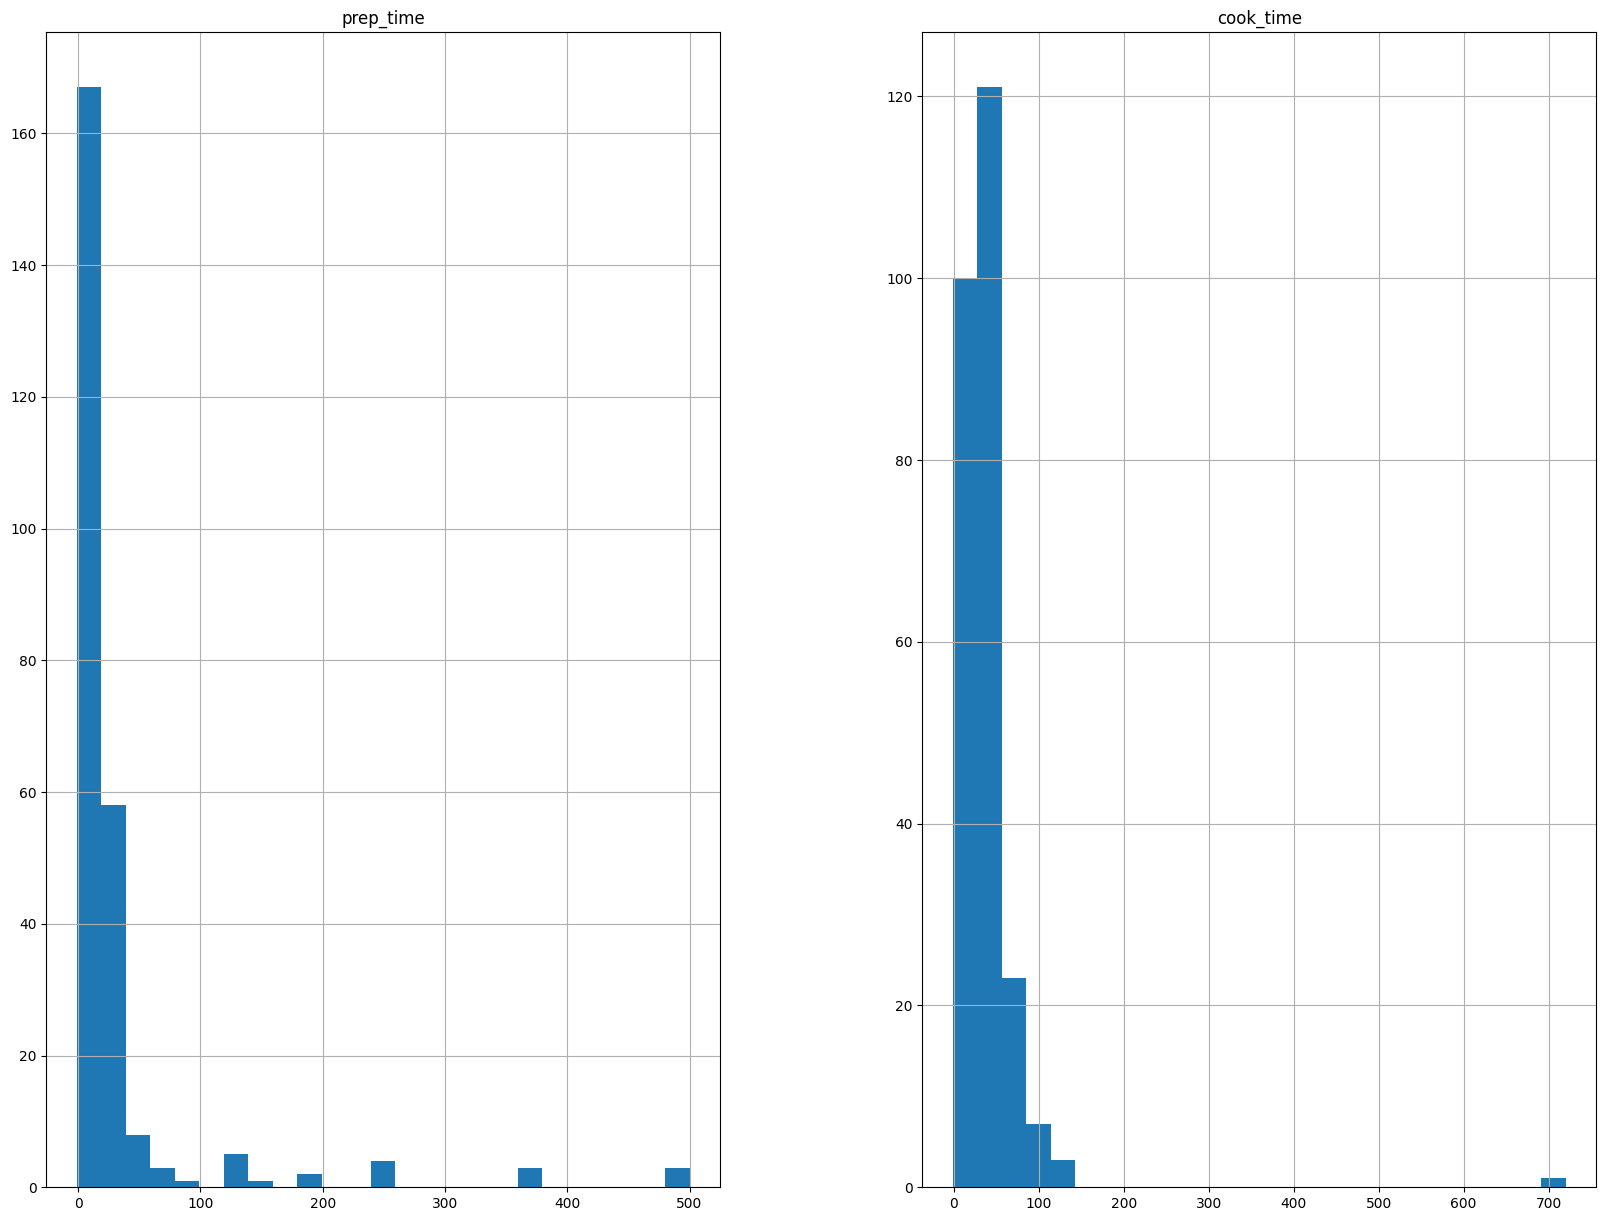

In [6]:
# data visualization

# histogram on our final data
data.hist(bins = 25,figsize=(20,15));

<Axes: >

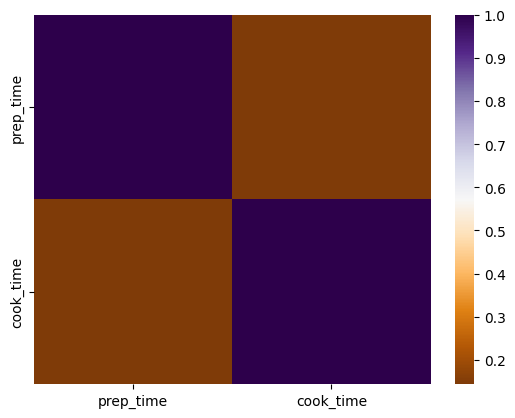

In [7]:
# Data Visualization

# Check for non-numeric columns
non_numeric_columns = data.select_dtypes(exclude=np.number).columns

# Drop non-numeric columns or convert them to numeric if possible
data_numeric = data.drop(columns=non_numeric_columns)

# Check for missing values and handle them (you can choose an appropriate strategy)
data_numeric.dropna(inplace=True)  # Drop rows with missing values for simplicity, you can choose another strategy if needed

# Now, create the heatmap
sns.heatmap(data_numeric.corr(), cmap='PuOr')


In [8]:
# Cleaning Data
data.loc[data['name'].isin(['Copra paak','Puttu','Kansar']),'flavor_profile']='sweet'
data.loc[data['flavor_profile'] == '-1', 'flavor_profile'] = "other"

In [9]:
# Cleaned values
data.tail(10)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
245,Pani Pitha,"Tea leaves, white sesame seeds, dry coconut, s...",vegetarian,10,20,other,main course,Assam,North East
246,Payokh,"Basmati rice, rose water, sugar, clarified but...",vegetarian,-1,-1,sweet,dessert,Assam,North East
247,Prawn malai curry,"Coconut milk, prawns, garlic, turmeric, sugar",non vegetarian,15,50,spicy,main course,West Bengal,East
248,Red Rice,"Red pepper, red onion, butter, watercress, oli...",vegetarian,-1,-1,other,main course,-1,-1
249,Shukto,"Green beans, bitter gourd, ridge gourd, banana...",vegetarian,10,20,spicy,main course,West Bengal,East
250,Til Pitha,"Glutinous rice, black sesame seeds, gur",vegetarian,5,30,sweet,dessert,Assam,North East
251,Bebinca,"Coconut milk, egg yolks, clarified butter, all...",vegetarian,20,60,sweet,dessert,Goa,West
252,Shufta,"Cottage cheese, dry dates, dried rose petals, ...",vegetarian,-1,-1,sweet,dessert,Jammu & Kashmir,North
253,Mawa Bati,"Milk powder, dry fruits, arrowroot powder, all...",vegetarian,20,45,sweet,dessert,Madhya Pradesh,Central
254,Pinaca,"Brown rice, fennel seeds, grated coconut, blac...",vegetarian,-1,-1,sweet,dessert,Goa,West


In [10]:
# Performing One hot encoding
discrete_df = pd.get_dummies(data,columns=['ingredients','diet','flavor_profile'])
discrete_df

,name,prep_time,cook_time,course,state,region,"ingredients_Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick","ingredients_Aloo, urad dal, mustard, ginger, curry leaves","ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili","ingredients_Apricots, sugar syrup",...,"ingredients_Yogurt, fresh coconut, sesame seeds, semolina, gram flour","ingredients_Yogurt, ginger, curry leaves, baking soda, green chilli","ingredients_Yogurt, milk, nuts, sugar",diet_non vegetarian,diet_vegetarian,flavor_profile_bitter,flavor_profile_other,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet
0,Balu shahi,45,25,dessert,West Bengal,East,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,Boondi,80,30,dessert,Rajasthan,West,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,Gajar ka halwa,15,60,dessert,Punjab,North,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,Ghevar,15,30,dessert,Rajasthan,West,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,Gulab jamun,15,40,dessert,West Bengal,East,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,Til Pitha,5,30,dessert,Assam,North East,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
251,Bebinca,20,60,dessert,Goa,West,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
252,Shufta,-1,-1,dessert,Jammu & Kashmir,North,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
253,Mawa Bati,20,45,dessert,Madhya Pradesh,Central,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [11]:
target= data['course']
df= discrete_df.drop(columns=['course','state','region','name'],axis=1)
df

,prep_time,cook_time,"ingredients_Aloo, tomatoes, mustard oil, bay leaf, cinnamon stick","ingredients_Aloo, urad dal, mustard, ginger, curry leaves","ingredients_Amaranth leaves, split urad dal, mustard seeds, grated coconut, red chili","ingredients_Apricots, sugar syrup","ingredients_Arbi ke patte, sesame seeds, gur, bengal gram flour, imli","ingredients_Arhar dal, coconut oil, curry leaves, mustard seeds, red chilli","ingredients_Arhar dal, sambar powder, tomato, curry leaves, fennel seeds","ingredients_Baby corn, french beans, garam masala, ginger, carrot",...,"ingredients_Yogurt, fresh coconut, sesame seeds, semolina, gram flour","ingredients_Yogurt, ginger, curry leaves, baking soda, green chilli","ingredients_Yogurt, milk, nuts, sugar",diet_non vegetarian,diet_vegetarian,flavor_profile_bitter,flavor_profile_other,flavor_profile_sour,flavor_profile_spicy,flavor_profile_sweet
0,45,25,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,80,30,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,15,60,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,15,30,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4,15,40,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,5,30,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
251,20,60,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
252,-1,-1,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
253,20,45,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


In [12]:
# Converting target string to numeric labels

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(data['course'])
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 3, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0,
       2, 2, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0])

In [13]:
# Performing ML Algorithms

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2)

# Logistic Regression Model
logistic_model = LogisticRegression(random_state=1812)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Calculating accuracy
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Printing results
acc_train_logistic = logistic_model.score(X_train, y_train) * 100
print(f'The accuracy of the Logistic Regression Model Train is {acc_train_logistic:.2f}')
acc_test_logistic = logistic_model.score(X_test, y_test) * 100
print(f'The accuracy of the Logistic Regression Model Test is {acc_test_logistic:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))


The accuracy of the Logistic Regression Model Train is 86.76
The accuracy of the Logistic Regression Model Test is 78.43
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.69      1.00      0.82        25
           2       1.00      0.08      0.15        12

    accuracy                           0.78        51
   macro avg       0.90      0.69      0.66        51
weighted avg       0.85      0.78      0.71        51



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
# Performing ML Algorithms

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2)

# Random Forest Model
random_forest_model = RandomForestClassifier(random_state=1812)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Calculating accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Printing results
acc_train_rf = random_forest_model.score(X_train, y_train) * 100
print(f'The accuracy of the Random Forest Model Train is {acc_train_rf:.2f}')
acc_test_rf = random_forest_model.score(X_test, y_test) * 100
print(f'The accuracy of the Random Forest Model Test is {acc_test_rf:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


The accuracy of the Random Forest Model Train is 100.00
The accuracy of the Random Forest Model Test is 78.43
Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        17
           1       0.72      0.88      0.79        24
           2       0.50      0.22      0.31         9
           3       0.00      0.00      0.00         1

    accuracy                           0.78        51
   macro avg       0.54      0.52      0.52        51
weighted avg       0.74      0.78      0.75        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Performing ML Algorithms

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2)

# KNN Model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# Printing results
acc_train_knn = knn_model.score(X_train, y_train) * 100
print(f'The accuracy of the KNN Model Train is {acc_train_knn:.2f}')
acc_test_knn = knn_model.score(X_test, y_test) * 100
print(f'The accuracy of the KNN Model Test is {acc_test_knn:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))


The accuracy of the KNN Model Train is 73.04
The accuracy of the KNN Model Test is 70.59
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        21
           1       0.72      0.75      0.73        24
           2       1.00      0.20      0.33         5
           3       0.00      0.00      0.00         1

    accuracy                           0.71        51
   macro avg       0.60      0.44      0.45        51
weighted avg       0.72      0.71      0.68        51



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
# Performing ML Algorithms

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.2)

# Decision Tree Model
decision_tree_model = DecisionTreeClassifier(random_state=1812)
decision_tree_model.fit(X_train, y_train)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Calculating accuracy
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

# Printing results
acc_train_decision_tree = decision_tree_model.score(X_train, y_train) * 100
print(f'The accuracy of the Decision Tree Model Train is {acc_train_decision_tree:.2f}')
acc_test_decision_tree = decision_tree_model.score(X_test, y_test) * 100
print(f'The accuracy of the Decision Tree Model Test is {acc_test_decision_tree:.2f}')

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_decision_tree))


The accuracy of the Decision Tree Model Train is 100.00
The accuracy of the Decision Tree Model Test is 84.31
Classification Report:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        21
           1       0.78      0.91      0.84        23
           2       1.00      0.14      0.25         7

    accuracy                           0.84        51
   macro avg       0.90      0.69      0.68        51
weighted avg       0.86      0.84      0.81        51



In [22]:
# prompt: recipe recommendation on based of ingredients  given as input  by user

def recommend_recipes(ingredients, n_recommendations):
  # Convert ingredients to a TF-IDF vector
  ingredients_vector = vectorizer.transform([ingredients])

  # Find the nearest neighbors
  distances, indices = model.kneighbors(ingredients_vector, n_neighbors=n_recommendations)

  # Return the recommended recipes
  recommended_recipes = data.iloc[indices[0][1:]]
  return recommended_recipes

# User input for ingredients
user_ingredients = input("Enter ingredients (comma-separated): ")

# Recommend recipes based on user input
recommended_recipes = recommend_recipes(user_ingredients, 11)

# Print the recommended recipes
print("Recommended recipes:")
for i, recipe in enumerate(recommended_recipes.itertuples(), 1):
  print(f"{i}. {recipe.name}")


Enter ingredients (comma-separated): Tea leaves, white sesame seeds, dry coconut
Recommended recipes:
1. Khandvi
2. Currivepillai sadam 
3. Churma Ladoo
4. Thayir sadam
5. Khaman
6. Bhakri
7. Sandige
8. Pachadi
9. Pakhala
10. Dalithoy
